<a href="https://colab.research.google.com/github/gustavoramos82/Predi-o-Pre-o-Carros/blob/main/Predi%C3%A7%C3%A3o_no_Pre%C3%A7o_dos_Carros_(Analise_Explorat%C3%B3ria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição Preço dos Carros

Neste projeto, com base no dataset obtido no kaggle (pode ser obtido aqui [aqui](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)) em qual vai ser feito uma análise exploratória, tratamento dos dados e aplicar modelos de machine learning para prever preços dos carros.

In [2]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px

## Análise Exploratória

In [3]:
# Importando o arquivo csv
car = pd.read_csv('car_price_prediction.csv')
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Dicionário dos Dados

- **Price**: Preço do carro.
- **Levy**: Cobrança de taxa.
- **Manufacturer**: Fabricante.
- **Model**: Modelo.
- **Prod. year**: Ano de Produção.
- **Category**: Categoria.
- **Leather interior**: Se tem interior em couro.
- **Fuel type**: Tipo de combustivel.
- **Engine volume**: Volume do motor.
- **Mileage**: Milhas Pecorridas.
- **Cylinders**: Numero de cilindradas.
- **Gear box type**: Tipo de caixa de engrenagens.
- **Drive wheels**:Rodas Motrizes.
- **Doors**: Número de portas.
- **Wheel**: Lado do volante.
- **Color**: Cor do carro.
- **Airbags**: Quantidade de airbags.

In [4]:
car.shape # vemos que o dataframe tem 18 colunas e 19.237 linhas

(19237, 18)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

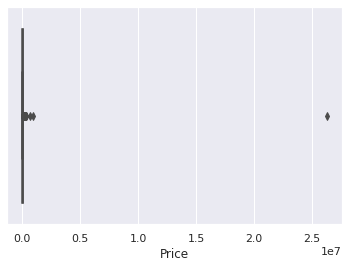

In [10]:
sns.boxplot(x='Price',data=car)

Podemos ver que temos um valor muito discrepante então vai ser melhor tirar porque não vai se ter uma boa análise com o mesmo nos dados.

In [12]:
np.max(car['Price'])

26307500

In [15]:
car = car[car['Price']<600000] # Tirando os outliers pois são valores muito ciscrepantes que não vai permitir fazer uma anlise dos dados

In [22]:
px.histogram(car,x='Price',marginal='box',title='Frequência dos Preço dos Carros')

In [29]:
car['Manufacturer'] = car['Manufacturer'].str.capitalize()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 7329 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 7329 missing from current font.



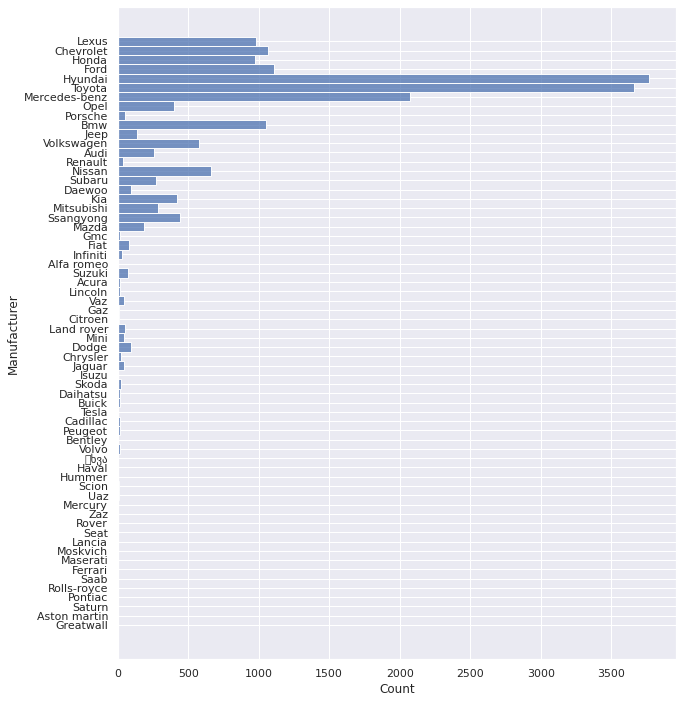

In [31]:
plt.figure(figsize=(10,12))
sns.histplot(y='Manufacturer',data=car);

Temos que os maiores fabricantes estão Hyundai e Toyota.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 7329 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 7329 missing from current font.



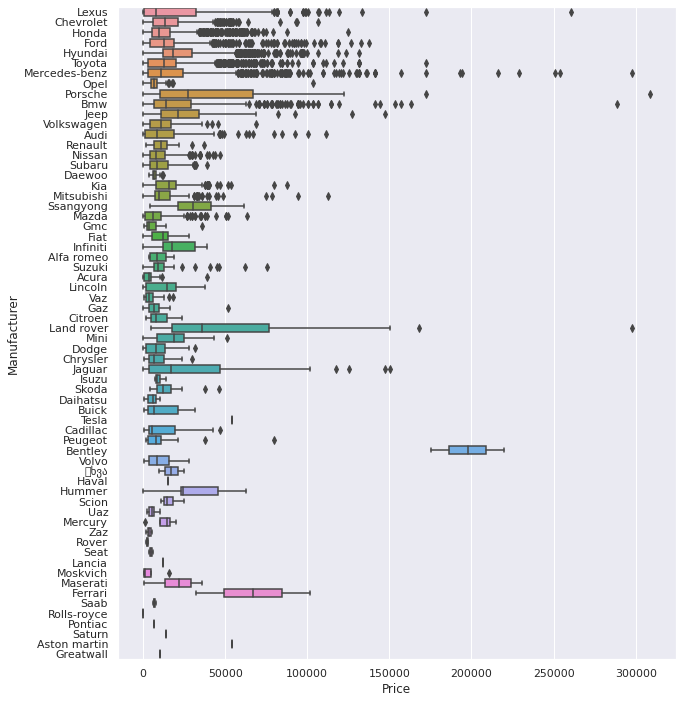

In [34]:
plt.figure(figsize=(10,12))
sns.boxplot(y='Manufacturer',x='Price',data=car)

Podemos ver que marcas como Peugeut, Uaz e Haval costuma ter preços mais baratos em comparação por exemplo de Bentley que costuma ter carros mais baratos

In [35]:
car['Mileage'] = car['Mileage'].str.replace('km','')
car['Mileage'] = car['Mileage'].astype(int)

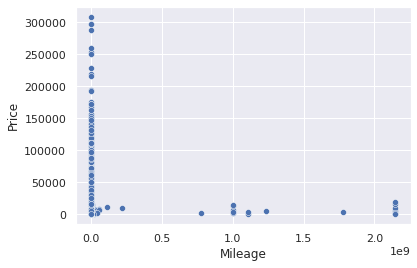

In [36]:
sns.scatterplot(x='Mileage',y='Price',data=car)

Text(0, 0.5, 'Frequência')

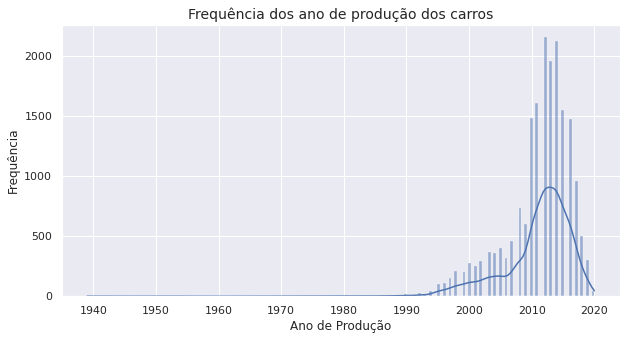

In [41]:
plt.figure(figsize=(10,5))
plt.title('Frequência dos ano de produção dos carros',fontsize=14)
sns.histplot(x='Prod. year',data=car,kde=True)
plt.xlabel('Ano de Produção')
plt.ylabel('Frequência')

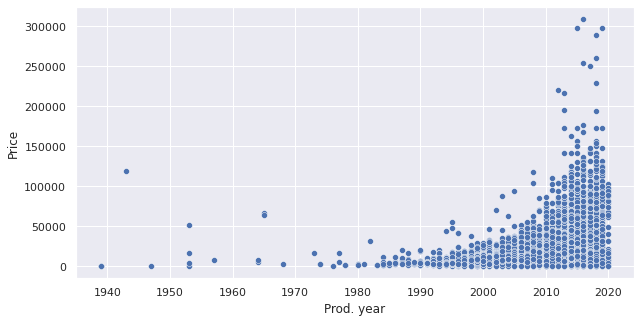

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Prod. year',y='Price',data=car)

Podemos ver que, conforme o ano vai se passando, mais é o intervalo dos preços.

Text(0, 0.5, 'Preço')

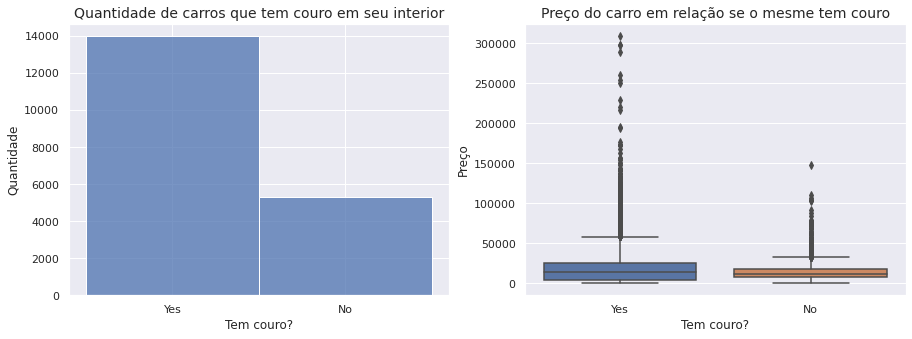

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Quantidade de carros que tem couro em seu interior',fontsize=14)
sns.histplot(x='Leather interior',data=car)
plt.xlabel('Tem couro?')
plt.ylabel('Quantidade')

plt.subplot(1,2,2)
plt.title('Preço do carro em relação se o mesme tem couro',fontsize=14)
sns.boxplot(x='Leather interior',y='Price',data=car)
plt.xlabel('Tem couro?')
plt.ylabel('Preço')

A maioria dos carros tem couro em seu interior, e apartir de 100 mil, temos q uma grande parte dos carros tem couro em seu interior.

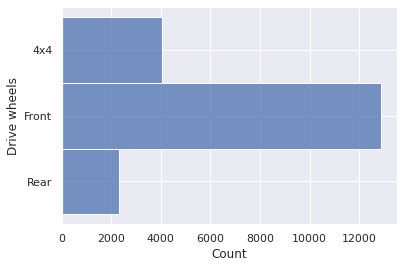

In [51]:
sns.histplot(y='Drive wheels',data=car)

<BarContainer object of 3 artists>

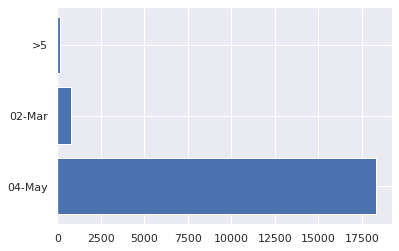

In [54]:
plt.barh(car['Doors'].value_counts().index,car['Doors'].value_counts())


A maioria dos carros tem 4 portas.

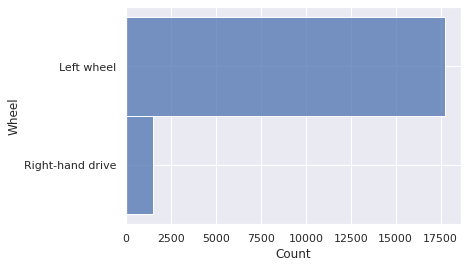

In [55]:
sns.histplot(y='Wheel',data=car)

A maioria da direção do volante é na esquerda.

In [57]:
car['Engine volume'] = car['Engine volume'].str.replace('Turbo','')
car['Engine volume'] = car['Engine volume'].astype(float)
px.scatter(car, x='Engine volume',y='Mileage',color='Price')


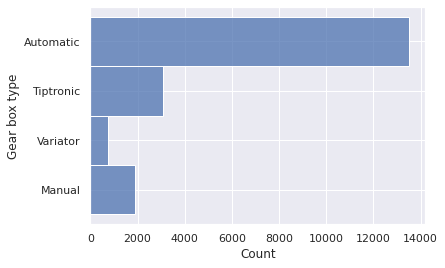

In [58]:
sns.histplot(y='Gear box type',data=car)

Text(0, 0.5, 'Cor')

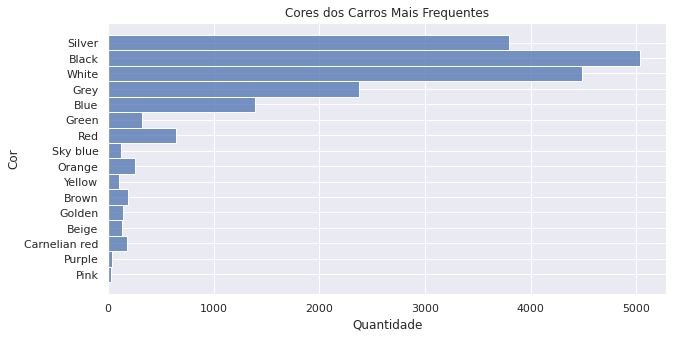

In [61]:
plt.figure(figsize=(10,5))
plt.title('Cores dos Carros Mais Frequentes')
sns.histplot(y='Color',data=car)
plt.xlabel('Quantidade')
plt.ylabel('Cor')

A maioria das cores dos carros é preto, branca e prata

Text(0, 0.5, 'Tipo de Combustivel')

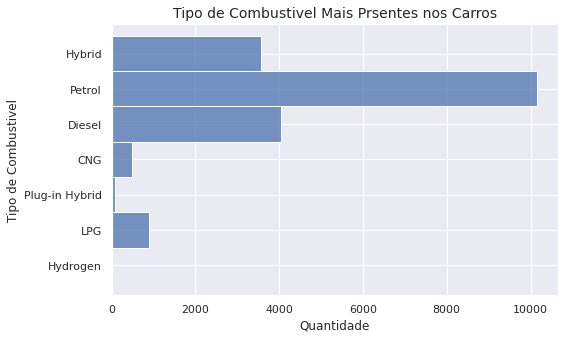

In [65]:
plt.figure(figsize=(8,5))
plt.title('Tipo de Combustivel Mais Prsentes nos Carros',fontsize=14)
sns.histplot(y='Fuel type',data=car)
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Combustivel')

In [67]:
car['Levy'] = car['Levy'].str.replace('-',f'{np.nan}')
car['Levy'] = car['Levy'].astype(float)

Text(0, 0.5, 'Preço')

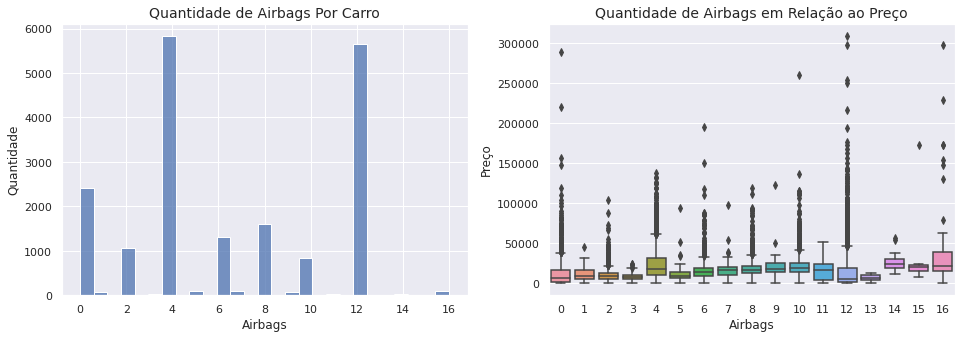

In [76]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title('Quantidade de Airbags Por Carro',fontsize=14)
sns.histplot(x='Airbags',data=car)
plt.ylabel('Quantidade')

plt.subplot(1,2,2)
plt.title('Quantidade de Airbags em Relação ao Preço', fontsize=14)
sns.boxplot(x='Airbags',y='Price',data=car)
plt.ylabel('Preço')

Podemos ver que  a maioria dos carros tem 4 e 12 airbaigs, e em relação ao preço com 14 e 15 e 11, tem-se um preço menor se comparado a 0, 4, 10 e 14.

Text(0, 0.5, 'Modelo')

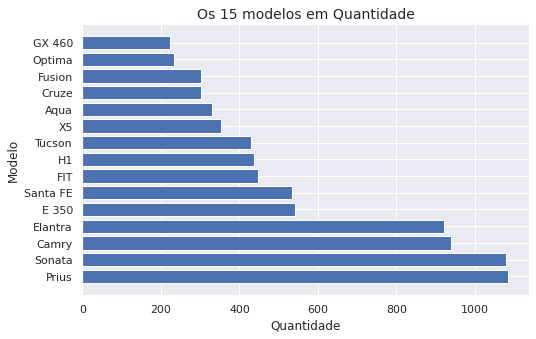

In [83]:
plt.figure(figsize=(8,5))
plt.title('Os 15 modelos em Quantidade',fontsize=14)
plt.barh(car['Model'].value_counts().index[0:15], car['Model'].value_counts()[0:15])
plt.xlabel('Quantidade')
plt.ylabel('Modelo')

Os três modelo que mais tem são Prius, Sonata e Camry